In [1]:
import warnings
warnings.simplefilter('ignore')
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [2]:
df = pd.read_csv('E:\CodeChef\Capstone Project\Cleaned DataSet\CleanedMergedData.csv')

In [3]:
df['month'] = pd.to_datetime(df['Invoice_DateTime']).dt.month

In [4]:
df['year'] = pd.to_datetime(df['Invoice_DateTime']).dt.year

In [5]:
df["Invoice_DateTime"]=pd.to_datetime(df["Invoice_DateTime"],dayfirst=True)
df["JobCard_DateTime"]=pd.to_datetime(df["JobCard_DateTime"],dayfirst=True)
df['Service_Time'] = df['Invoice_DateTime'] - df['JobCard_DateTime']

In [6]:
df['Service_Time_Hrs'] = df['Service_Time']/np.timedelta64(1,'h')

In [7]:
df['Service_Time_Hrs'].describe()

count   936275.000000
mean        89.878782
std        275.095915
min         -0.009167
25%          4.048611
50%         23.258889
75%         73.230278
max      17769.261389
Name: Service_Time_Hrs, dtype: float64

In [8]:
# to see and remove entries which have negative time as min value has negative entry
df[df['Service_Time_Hrs']<0]

,Unnamed: 0,Unnamed: 0.1,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Clean_Location,Clean_City,Clean_State,JobCard_DateTime,Invoice_DateTime,Service_Time,Business Partner,Partner Type,Data Origin,DBM Order,Item Category,Net value,Order Quantity,month,year,Service_Time_Hrs
714423,714423,794156,Retail,182085,00:00:00,7167000988,363294,62001,0.000000,MARUTI SUZUKI,0.000000,SWIFT DZIRE,0.000000,Running Repairs,0.000000,603103,X085,X085 - SRI MOTORS,NO,0.000000,0.000000,X085SA1,"Pudupakkam, Padur, Kelambakkam, Thaiyur",Kanchipuram,Tamil Nadu,2016-05-02 15:12:44,2016-05-02 15:12:11,-1 days +23:59:27,NaN,nan,NaN,363294.000000,G2TX,0.000000,0.000000,5,2016,-0.009167


In [9]:
df.drop(index=714423,axis=0,inplace=True)

In [10]:
#To cross check if all entries with negative time has been removed or not
df[df['Service_Time_Hrs']<0]

,Unnamed: 0,Unnamed: 0.1,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Clean_Location,Clean_City,Clean_State,JobCard_DateTime,Invoice_DateTime,Service_Time,Business Partner,Partner Type,Data Origin,DBM Order,Item Category,Net value,Order Quantity,month,year,Service_Time_Hrs


In [11]:
df['Service_Time_Hrs'].describe()

count   936274.000000
mean        89.878878
std        275.096046
min          0.010000
25%          4.048611
50%         23.259028
75%         73.230278
max      17769.261389
Name: Service_Time_Hrs, dtype: float64

### Clustering 

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Clean_Location,Clean_City,Clean_State,JobCard_DateTime,Invoice_DateTime,Service_Time,Business Partner,Partner Type,Data Origin,DBM Order,Item Category,Net value,Order Quantity,month,year,Service_Time_Hrs
0,0,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Maharashtra,2014-12-13 14:29:43,2015-01-02 11:30:36,19 days 21:00:53,NaN,nan,NaN,168303.000000,P001,1203.140000,73.000000,1,2015,477.014722
1,1,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Maharashtra,2014-12-13 14:29:43,2015-01-02 11:30:36,19 days 21:00:53,NaN,nan,NaN,168303.000000,P002,2348.750000,6.500000,1,2015,477.014722
2,2,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Maharashtra,2014-12-13 14:29:43,2015-01-02 11:30:36,19 days 21:00:53,NaN,nan,NaN,168303.000000,P010,500.060000,1.000000,1,2015,477.014722
3,3,1,Retail,84419,00:00:00,7005200003,173997,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,"Thane East, Kopri Colony",Thane,Maharashtra,2015-01-02 14:12:18,2015-01-03 10:07:32,0 days 19:55:14,NaN,nan,NaN,173997.000000,P001,804.260000,170.000000,1,2015,19.920556
4,4,1,Retail,84419,00:00:00,7005200003,173997,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,"Thane East, Kopri Colony",Thane,Maharashtra,2015-01-02 14:12:18,2015-01-03 10:07:32,0 days 19:55:14,NaN,nan,NaN,173997.000000,P011,197.030000,1.000000,1,2015,19.920556


In [13]:
#### Selecting columns required for clustering

cluster_df = df[['Cust Type','Customer No.','Make','Model','Order Type','Clean_City','Clean_Location','Invoice No','Service_Time_Hrs','Total Amt Wtd Tax.','Net value']]

In [14]:
cluster_df.isnull().sum()

Cust Type                 0
Customer No.              0
Make                      0
Model                  3185
Order Type                0
Clean_City            94162
Clean_Location        94162
Invoice No                0
Service_Time_Hrs          0
Total Amt Wtd Tax.        0
Net value                39
dtype: int64

In [15]:
cluster_df = cluster_df[cluster_df['Model'].notnull()]
cluster_df = cluster_df[cluster_df['Clean_City'].notnull()]
cluster_df = cluster_df[cluster_df['Clean_Location'].notnull()]
cluster_df = cluster_df[cluster_df['Net value'].notnull()]

In [16]:
cluster_df.isnull().sum()

Cust Type             0
Customer No.          0
Make                  0
Model                 0
Order Type            0
Clean_City            0
Clean_Location        0
Invoice No            0
Service_Time_Hrs      0
Total Amt Wtd Tax.    0
Net value             0
dtype: int64

In [17]:
cluster_df.shape

(839153, 11)

In [18]:
cluster_df.head()

,Cust Type,Customer No.,Make,Model,Order Type,Clean_City,Clean_Location,Invoice No,Service_Time_Hrs,Total Amt Wtd Tax.,Net value
0,Retail,67849,GENERAL MOTORS,SPARK,Paid Service,Thane,"Thane Bazar, Thane H.O, Thane R.S.",7005200002,477.014722,4051.950000,1203.140000
1,Retail,67849,GENERAL MOTORS,SPARK,Paid Service,Thane,"Thane Bazar, Thane H.O, Thane R.S.",7005200002,477.014722,4051.950000,2348.750000
2,Retail,67849,GENERAL MOTORS,SPARK,Paid Service,Thane,"Thane Bazar, Thane H.O, Thane R.S.",7005200002,477.014722,4051.950000,500.060000
3,Retail,84419,TATA MOTORS,INDICA,SMC Value Package,Thane,"Thane East, Kopri Colony",7005200003,19.920556,1001.290000,804.260000
4,Retail,84419,TATA MOTORS,INDICA,SMC Value Package,Thane,"Thane East, Kopri Colony",7005200003,19.920556,1001.290000,197.030000


### Selecting columns required for clustering

In [19]:
clusters = cluster_df.groupby(['Customer No.','Cust Type','Make','Model','Clean_City','Order Type']).agg(
                                {
                                 'Invoice No':'nunique',
                                 'Net value':'sum',
                                 'Service_Time_Hrs':'mean'
                                }
                            )

In [20]:
clusters.head()

Invoice No  \
Customer No. Cust Type Make           Model   Clean_City Order Type                    
1            Retail    MARUTI SUZUKI  KIZASHI Pune       Paid Service              1   
                                      OMNI    Pune       Paid Service              2   
                                                         Running Repairs           1   
10           Retail    GENERAL MOTORS OPTRA   Mumbai     Paid Service              4   
                                                         Running Repairs           1   

                                                                            Net value  \
Customer No. Cust Type Make           Model   Clean_City Order Type                     
1            Retail    MARUTI SUZUKI  KIZASHI Pune       Paid Service        0.000000   
                                      OMNI    Pune       Paid Service        0.000000   
                                                         Running Repairs     0.000000   
10           Retail    GENERAL MOTORS OPTRA   Mumbai     Paid Service    10505.720000   
                                                         Running Repairs   599.840000   

                                                                          Service_Time_Hrs  
Customer No. Cust Type Make           Model   Clean_City Order Type                         
1            Retail    MARUTI SUZUKI  KIZASHI Pune       Paid Service           901.082222  
                                      OMNI    Pune       Paid Service          2674.040000  
                                                         Running Repairs        321.365833  
10           Retail    GENERAL MOTORS OPTRA   Mumbai     Paid Service            20.744222  
                                                         Running Repairs          3.071389

In [21]:
clusters.columns

Index(['Invoice No', 'Net value', 'Service_Time_Hrs'], dtype='object')

In [22]:
clusters.columns =['Total Invoices','Total Revenue','Total Servicing Hrs']

In [23]:
clusters = clusters.reset_index()

In [ ]:
clusters.shape

(310983, 9)

### Cluster Analysis

#### Separating customers with zero revenue

In [ ]:
zero_revenue = clusters[clusters['Total Revenue']<=0]

In [ ]:
zero_revenue.shape

(26327, 9)

In [ ]:
zero_revenue['Clusters'] = 'Zero Revenue'

In [ ]:
zero_revenue.head()

,Customer No.,Cust Type,Make,Model,Clean_City,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,Clusters
0,1,Retail,MARUTI SUZUKI,KIZASHI,Pune,Paid Service,1,0.000000,901.082222,Zero Revenue
1,1,Retail,MARUTI SUZUKI,OMNI,Pune,Paid Service,2,0.000000,2674.040000,Zero Revenue
2,1,Retail,MARUTI SUZUKI,OMNI,Pune,Running Repairs,1,0.000000,321.365833,Zero Revenue
10,10000,Retail,MARUTI SUZUKI,WAGONR,Hyderabad,SMC Redemption,2,0.000000,1.629167,Zero Revenue
16,100002,Retail,FORD,FIGO,Panchkula,Running Repairs,1,0.000000,0.113333,Zero Revenue


#### Separating customers with non zero revenue

In [ ]:
non_zero_revenue = clusters[clusters['Total Revenue']>0]

In [ ]:
non_zero_revenue.shape

(284656, 9)

In [ ]:
non_zero_revenue.head()

,Customer No.,Cust Type,Make,Model,Clean_City,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs
3,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Paid Service,4,10505.720000,20.744222
4,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Running Repairs,1,599.840000,3.071389
5,100,Retail,HONDA,CITY,Mumbai,Accidental,1,14167.070000,98.988333
6,100,Retail,HONDA,CITY,Mumbai,Paid Service,1,6632.670000,49.808333
7,1000,Retail,MARUTI SUZUKI,ALTO,Pune,Paid Service,4,7617.270000,5.224389


In [ ]:
print("0.05 quantile :-",non_zero_revenue['Total Revenue'].quantile(0.05))
print("0.25 quantile :-",non_zero_revenue['Total Revenue'].quantile(0.25))
print("0.50 quantile :-",non_zero_revenue['Total Revenue'].quantile(0.50))
print("0.75 quantile :-",non_zero_revenue['Total Revenue'].quantile(0.75))
print("0.95 quantile :-",non_zero_revenue['Total Revenue'].quantile(0.95))
print("minimum total revenue :-",non_zero_revenue['Total Revenue'].min())
print("maximum total revenue :-",non_zero_revenue['Total Revenue'].max())
print("mean total revenue :-",non_zero_revenue['Total Revenue'].mean())

0.05 quantile :- 148.58
0.25 quantile :- 696.8774999999998
0.50 quantile :- 2600.5
0.75 quantile :- 6875.282499999999
0.95 quantile :- 25853.585
minimum total revenue :- 0.01
maximum total revenue :- 3852506.8100000084
mean total revenue :- 6912.321603901306


#### Quantile Analysis of Total Revenue  is used to segment customers based on Revenue

In [ ]:
# Low revenue customers (less than 0.50 quantile)
low_rewarding = non_zero_revenue[(non_zero_revenue['Total Revenue']< non_zero_revenue['Total Revenue'].quantile(0.50))]

# Medium revenue customers (between 0.50 to 0.75 quantile)
medium_rewarding = non_zero_revenue[
                            (non_zero_revenue['Total Revenue'] > non_zero_revenue['Total Revenue'].quantile(0.50)) & 
                            (non_zero_revenue['Total Revenue']< non_zero_revenue['Total Revenue'].quantile(0.75))
                         ]

# High revenue customers (moe than 0.95 quantile)
highly_rewarding = non_zero_revenue[
                        (non_zero_revenue['Total Revenue'] > non_zero_revenue['Total Revenue'].quantile(0.75))
                       ]

In [ ]:
print(low_rewarding.shape)
print(medium_rewarding.shape)
print(highly_rewarding.shape)

(142326, 9)
(71163, 9)
(71164, 9)


In [ ]:
# Naming the clusters
low_rewarding['Clusters'] = 'Low Rewarding and Future Prospect'
medium_rewarding['Clusters'] = 'Medium Rewarding and Satisfied'
highly_rewarding['Clusters'] = 'Highly Rewarding and Loyal'

In [ ]:
revenue_cluster = pd.concat([low_rewarding,medium_rewarding,highly_rewarding],axis=0)

In [ ]:
revenue_cluster.groupby(['Clusters']).agg({'Total Revenue':'mean','Total Servicing Hrs':'mean','Customer No.':'count'}).sort_values('Total Revenue',ascending=False)

,Total Revenue,Total Servicing Hrs,Customer No.
Clusters,,,
Highly Rewarding and Loyal,21504.487682,176.953781,71164
Medium Rewarding and Satisfied,4312.884887,76.767076,71163
Low Rewarding and Future Prospect,915.945283,55.597661,142326


In [ ]:
import seaborn as sns
sns.lmplot(data=revenue_cluster,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,height=5,aspect=2,scatter_kws={"s": 100})

###  Segmenting Customers based on avg servicing time

In [ ]:
print("0.05 quantile :-",non_zero_revenue['Total Servicing Hrs'].quantile(0.05))
print("0.25 quantile :-",non_zero_revenue['Total Servicing Hrs'].quantile(0.25))
print("0.50 quantile :-",non_zero_revenue['Total Servicing Hrs'].quantile(0.50))
print("0.75 quantile :-",non_zero_revenue['Total Servicing Hrs'].quantile(0.75))
print("0.95 quantile :-",non_zero_revenue['Total Servicing Hrs'].quantile(0.95))
print("mimimum servicing time in hrs :-",non_zero_revenue['Total Servicing Hrs'].min())
print("maximum servicing time in hrs :-",non_zero_revenue['Total Servicing Hrs'].max())
print("mean servicing time in hrs :-",non_zero_revenue['Total Servicing Hrs'].mean())

0.05 quantile :- 0.23055555555555557
0.25 quantile :- 3.3830555555555555
0.50 quantile :- 21.02954861111111
0.75 quantile :- 72.82111111111112
0.95 quantile :- 387.2446875
mimimum servicing time in hrs :- 0.010277777777777778
maximum servicing time in hrs :- 17453.070833333335
mean servicing time in hrs :- 91.23086523167979


### Quantile Analysis of Total Servicing Hrs is used for segmenting customer as per Service Time duration

In [ ]:
# very rapid service (less than 0.50 quantile)
very_rapid = non_zero_revenue[non_zero_revenue['Total Servicing Hrs']< non_zero_revenue['Total Servicing Hrs'].quantile(0.50)]

# rapid service (between 0.50 to 0.75 quantile)
rapid = non_zero_revenue[
                (non_zero_revenue['Total Servicing Hrs']> non_zero_revenue['Total Servicing Hrs'].quantile(0.50)) & 
                (non_zero_revenue['Total Servicing Hrs']< non_zero_revenue['Total Servicing Hrs'].quantile(0.75))
                ]

# slow service (between 0.75 to 0.95 quantile)
slow = non_zero_revenue[
                (non_zero_revenue['Total Servicing Hrs'] > non_zero_revenue['Total Servicing Hrs'].quantile(0.75)) & 
                (non_zero_revenue['Total Servicing Hrs'] < non_zero_revenue['Total Servicing Hrs'].quantile(0.95))
                ]

# extremely slow service (more than 0.95 quantile)
extremely_slow = non_zero_revenue[
                        non_zero_revenue['Total Servicing Hrs'] > non_zero_revenue['Total Servicing Hrs'].quantile(0.95)
                     ]


In [ ]:
print(very_rapid.shape)
print(rapid.shape)
print(slow.shape)
print(extremely_slow.shape)

(142328, 9)
(71164, 9)
(56931, 9)
(14233, 9)


In [ ]:
very_rapid['Clusters'] = 'Very Rapid'
rapid['Clusters'] = 'Rapid'
slow['Clusters'] = 'Slow'
extremely_slow['Clusters'] = 'Extremely Slow'

In [ ]:
servicetime_cluster = pd.concat([very_rapid,rapid,slow,extremely_slow],axis=0)

In [ ]:
servicetime_cluster.groupby(['Clusters']).agg({'Total Revenue':'mean','Total Servicing Hrs':'mean','Customer No.':'count'}).sort_values('Total Servicing Hrs',ascending=True)

,Total Revenue,Total Servicing Hrs,Customer No.
Clusters,,,
Very Rapid,2665.532217,4.685069,142328
Rapid,6793.334705,39.476048,71164
Slow,12746.639368,164.518031,56931
Extremely Slow,26637.683708,922.303598,14233


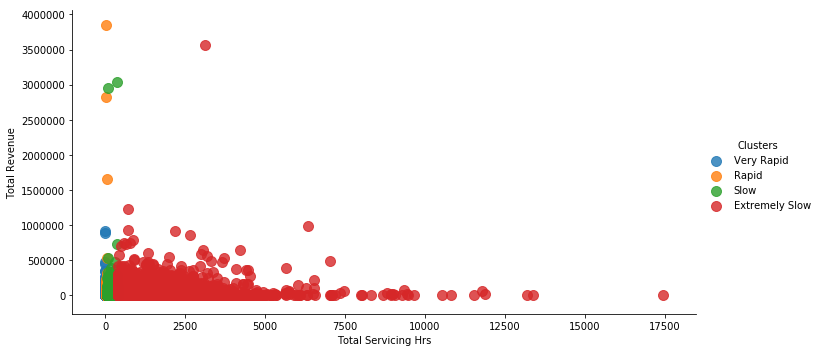

In [ ]:
import seaborn as sns
sns.lmplot(data=servicetime_cluster,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,height=5,aspect=2,scatter_kws={"s": 100})

### K-Means Clustering

In [ ]:
final_cluster = non_zero_revenue

In [ ]:
final_cluster.shape

(284656, 9)

In [ ]:
final_cluster.describe()

,Total Invoices,Total Revenue,Total Servicing Hrs
count,284656.000000,284656.000000,284656.000000
mean,1.440328,6912.321604,91.230865
std,2.679905,21860.715802,279.271556
min,1.000000,0.010000,0.010278
25%,1.000000,696.877500,3.383056
50%,1.000000,2600.500000,21.029549
75%,1.000000,6875.282500,72.821111
max,925.000000,3852506.810000,17453.070833


In [ ]:
final_cluster.head()

,Customer No.,Cust Type,Make,Model,Clean_City,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs
3,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Paid Service,4,10505.720000,20.744222
4,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Running Repairs,1,599.840000,3.071389
5,100,Retail,HONDA,CITY,Mumbai,Accidental,1,14167.070000,98.988333
6,100,Retail,HONDA,CITY,Mumbai,Paid Service,1,6632.670000,49.808333
7,1000,Retail,MARUTI SUZUKI,ALTO,Pune,Paid Service,4,7617.270000,5.224389


#### Label Encoding Categorical Columns

In [ ]:
X = final_cluster.drop(['Customer No.'],axis=1)

In [ ]:
le=LabelEncoder()
X["Make"]=le.fit_transform(X["Make"])
X["Model"]=le.fit_transform(X["Model"])
X["Clean_City"]=le.fit_transform(X["Clean_City"])
X["Cust Type"]=le.fit_transform(X["Cust Type"])
X["Order Type"]=le.fit_transform(X["Order Type"])

In [ ]:
X.head()

,Cust Type,Make,Model,Clean_City,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs
3,6,6,146,285,2,4,10505.720000,20.744222
4,6,6,146,285,4,1,599.840000,3.071389
5,6,8,50,285,0,1,14167.070000,98.988333
6,6,8,50,285,2,1,6632.670000,49.808333
7,6,13,16,339,2,4,7617.270000,5.224389


#### Scaling the features

In [ ]:
ss = StandardScaler()
X=ss.fit_transform(X)

In [ ]:
final_scaled_df = pd.DataFrame(X)
final_scaled_df.columns = ['Cust Type','Make','Model','Clean_City','Order Type','Total Invoices','Total Revenue','Total Servicing Hrs']
final_scaled_df.head()

,Cust Type,Make,Model,Clean_City,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs
0,0.040313,-1.221489,0.210503,0.349681,-0.566148,0.955137,0.164377,-0.252395
1,0.040313,-1.221489,0.210503,0.349681,0.763544,-0.164308,-0.288760,-0.315677
2,0.040313,-0.883150,-1.111337,0.349681,-1.895840,-0.164308,0.331863,0.027778
3,0.040313,-0.883150,-1.111337,0.349681,-0.566148,-0.164308,-0.012792,-0.148324
4,0.040313,-0.037302,-1.579489,0.762621,-0.566148,0.955137,0.032247,-0.307968


#### Calculating wcss score using elbow method

In [ ]:
wcss=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,random_state=42,init='k-means++')
    clf.fit(X)
    wcss.append(clf.inertia_)

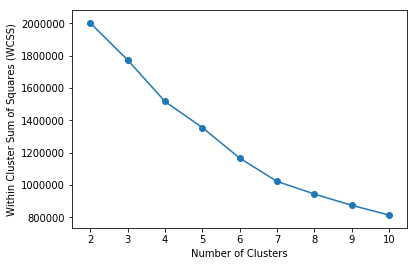

In [ ]:
import matplotlib.pyplot as plt
x=np.arange(2,11)
plt.plot(x,wcss)
plt.scatter(x,wcss)
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.xlabel("Number of Clusters");

### Calculating silhoutte score

In [ ]:
sil_score=[]
for j in range(2,11):
    kmeans=KMeans(n_clusters=j,init='k-means++',random_state=42)
    kmeans.fit(X)
    labels=kmeans.labels_
    centroids=kmeans.cluster_centers_
    sil_score.append(silhouette_score(X, labels, metric='euclidean'))

In [ ]:
x=np.arange(2,11)
plt.plot(x,sil_score)
plt.scatter(x,sil_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

In [ ]:
clf_final=KMeans(n_clusters=6,random_state=42,init='k-means++')

In [ ]:
clf_final.fit(X)

In [ ]:
final_cluster["Clusters"]=clf_final.predict(X)

In [ ]:
final_cluster.head()

In [ ]:
final_cluster.to_csv('Clustering_Final.csv')

In [ ]:
cluster_representation = final_cluster.groupby(["Clusters","Cust Type"]).agg({"Total Revenue":"mean","Total Servicing Hrs":'mean',"Customer No.":"count"}).sort_values('Total Revenue')

In [ ]:
final_cluster.groupby(["Clusters","Order Type"]).agg({"Total Revenue":"mean","Total Servicing Hrs":'mean',"Customer No.":"count"})

In [ ]:
cluster_representation.columns = ['Avg revenue','Avg Servicing Hrs','Customer Count']

In [ ]:
cluster_representation = cluster_representation.reset_index()

In [ ]:
cluster_representation.sort_values(by='Clusters')

In [ ]:
cluster_representation.to_csv('Clustering_Representation.csv')

In [ ]:
sns.lmplot(data=final_cluster,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})